In [ ]:
#objective: Predict total number of demand of orders

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import ensemble

In [4]:
df = pd.read_csv('../datasets/Daily_Demand_Forecasting_Orders.csv', sep=";")

In [5]:
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [7]:
df.columns = ['week','day','Non-urgent order',
 'Urgent order',
 'Order type A',
 'Order type B',
 'Order type C',
 'Fiscal sector orders',
 'Orders from the traffic controller sector',
 'Banking orders (1)',
 'Banking orders (2)',
 'Banking orders (3)',
 'Target']

In [8]:
df.columns.tolist()

['week',
 'day',
 'Non-urgent order',
 'Urgent order',
 'Order type A',
 'Order type B',
 'Order type C',
 'Fiscal sector orders',
 'Orders from the traffic controller sector',
 'Banking orders (1)',
 'Banking orders (2)',
 'Banking orders (3)',
 'Target']

In [9]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(60, 13)

In [10]:
df.describe()

,week,day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


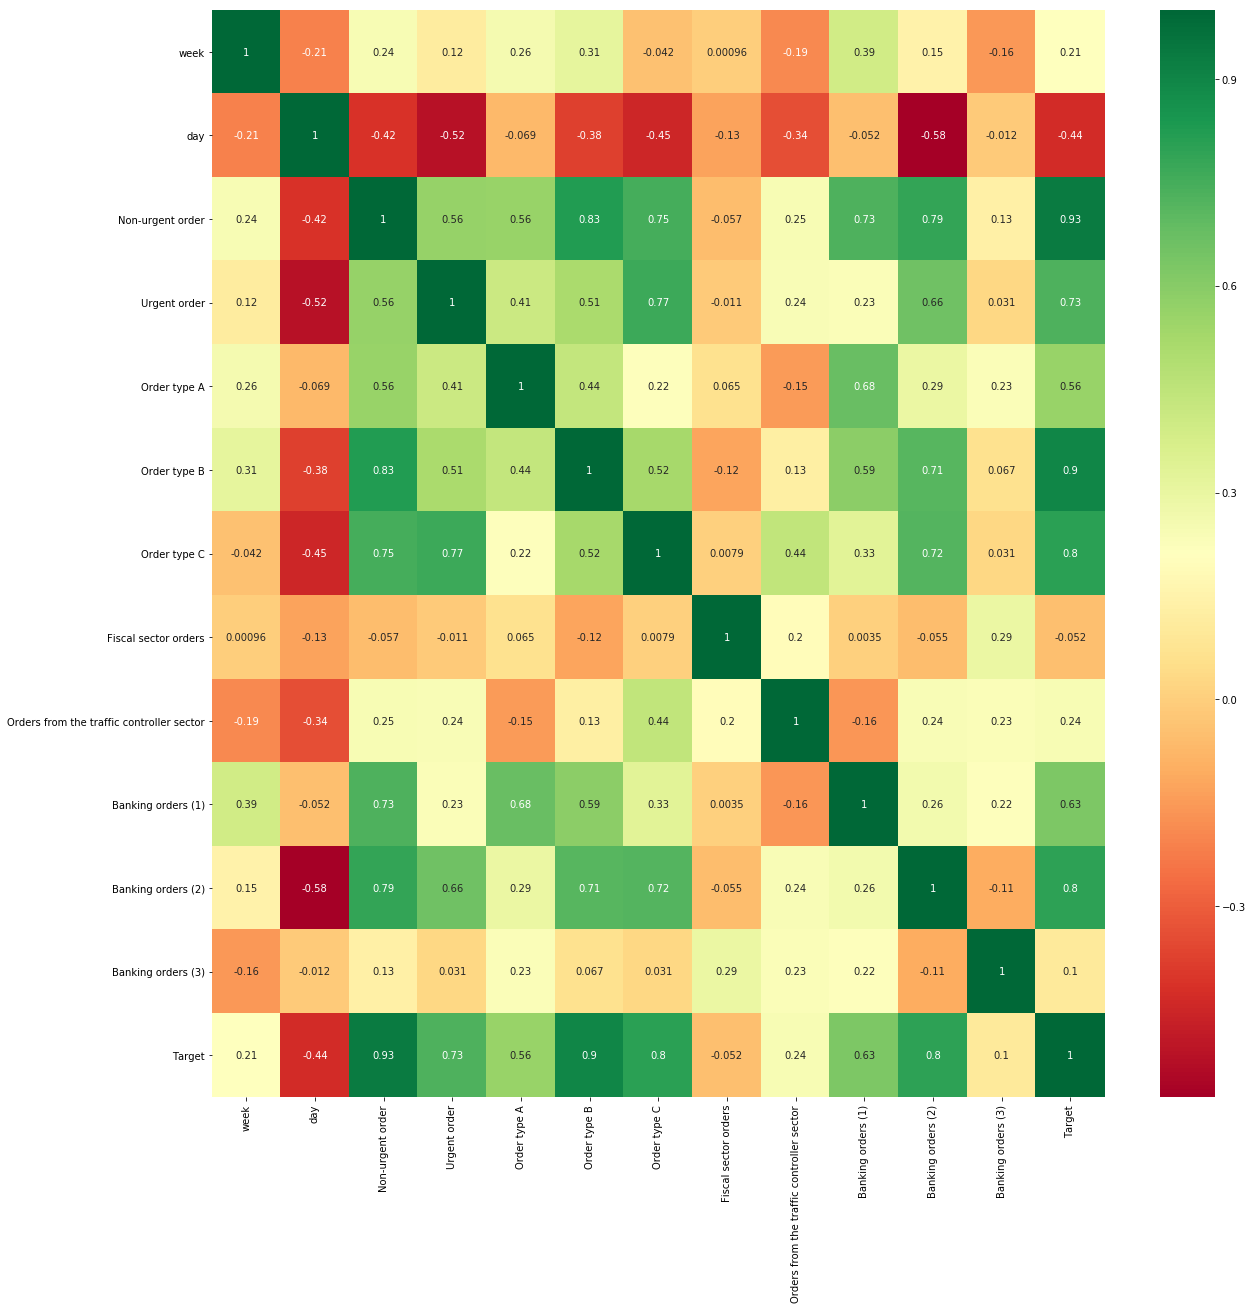

In [11]:
#correlation
x = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [12]:
df_cat = df[['week','day']]
df_cat2 = pd.get_dummies(df_cat, columns=['week','day'], drop_first=False)
df_cat2.reset_index(drop=True, inplace=True)

In [13]:
scaler = preprocessing.MinMaxScaler()
to_scale_df = df[['Non-urgent order',
 'Urgent order',
 'Order type A',
 'Order type B',
 'Order type C',
 'Fiscal sector orders',
 'Orders from the traffic controller sector',
 'Banking orders (1)',
 'Banking orders (2)',
 'Banking orders (3)']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Non-urgent order',
 'Urgent order',
 'Order type A',
 'Order type B',
 'Order type C',
 'Fiscal sector orders',
 'Orders from the traffic controller sector',
 'Banking orders (1)',
 'Banking orders (2)',
 'Banking orders (3)'])
scaled_df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
df['Target'].reset_index(drop=True, inplace=True)

In [15]:
#combine data
df_new = pd.concat([scaled_df, df_cat2,df['Target']], axis=1)
df_new.shape

(60, 21)

In [21]:
df_new.columns.tolist()

['Non-urgent order',
 'Urgent order',
 'Order type A',
 'Order type B',
 'Order type C',
 'Fiscal sector orders',
 'Orders from the traffic controller sector',
 'Banking orders (1)',
 'Banking orders (2)',
 'Banking orders (3)',
 'week_1',
 'week_2',
 'week_3',
 'week_4',
 'week_5',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'Target']

In [22]:
df_new.drop(['week_5','day_6'], axis=1)

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),week_1,week_2,week_3,week_4,day_2,day_3,day_4,day_5,Target
0,0.696167,1.000000,0.412207,0.621183,1.000000,0.000000,0.896019,0.200245,1.000000,0.107527,1,0,0,0,0,0,1,0,539.577
1,0.216983,0.127972,0.168466,0.127621,0.246444,0.000000,0.475527,0.086677,0.424709,0.000000,1,0,0,0,0,0,0,1,224.675
2,0.000000,0.048006,0.000000,0.000000,0.035466,0.001602,0.000000,0.000000,0.028453,0.109855,1,0,0,0,0,0,0,0,129.412
3,0.325916,0.344732,0.204625,0.364008,0.385450,0.020990,0.635313,0.146101,0.306064,0.162394,0,1,0,0,1,0,0,0,317.120
4,0.119700,0.247808,0.164532,0.130020,0.183483,0.007467,0.611275,0.078211,0.000000,0.190115,0,1,0,0,0,1,0,0,210.517
5,0.171769,0.130152,0.093055,0.105604,0.225784,0.091329,0.669957,0.025698,0.180878,0.261291,0,1,0,0,0,0,1,0,207.364
6,0.256536,0.284772,0.222912,0.170285,0.346358,0.000000,0.578471,0.145589,0.185221,0.200937,0,1,0,0,0,0,0,1,263.043
7,0.193355,0.250166,0.173925,0.251163,0.219405,0.018161,0.385430,0.110241,0.234035,0.163588,0,1,0,0,0,0,0,0,248.958
8,0.447348,0.322209,0.126069,0.508424,0.384398,0.001218,0.913684,0.077317,0.505610,0.042004,0,0,1,0,1,0,0,0,344.291
9,0.262648,0.162263,0.151248,0.075061,0.413682,1.000000,0.773369,0.020719,0.383628,0.064525,0,0,1,0,0,1,0,0,248.428


In [23]:
#data split
X = df_new.drop('Target', axis=1)
y = df_new[['Target']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[0][idx]))

The coefficient for Non-urgent order is -1.82751978629855e-12
The coefficient for Urgent order is -5.115907697472721e-13
The coefficient for Order type A is 96.35200000000029
The coefficient for Order type B is 242.2170000000009
The coefficient for Order type C is 228.07600000000093
The coefficient for Fiscal sector orders is -2.398081733190338e-14
The coefficient for Orders from the traffic controller sector is -7.460698725481052e-14
The coefficient for Banking orders (1) is -1.7763568394002505e-13
The coefficient for Banking orders (2) is 2.7000623958883807e-13
The coefficient for Banking orders (3) is 1.723066134218243e-13
The coefficient for week_1 is -2.042810365310288e-13
The coefficient for week_2 is -1.8474111129762605e-13
The coefficient for week_3 is -1.2356782264077992e-13
The coefficient for week_4 is -1.3916645613676337e-13
The coefficient for week_5 is -6.394884621840902e-14
The coefficient for day_2 is 1.8474111129762605e-13
The coefficient for day_3 is 1.172395514004165

In [26]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [27]:
#regression metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R2:', regr.score(X_test, y_test))

Mean Absolute Error: 1.3263464400855204e-13
Mean Squared Error: 3.812785635986612e-26
Root Mean Squared Error: 1.952635561487758e-13
R2: 1.0
